# Generate random graph signal using Probabilistic Graphical Models

## Generate a random network


In [1]:
import numpy as np
import scipy as sp
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.pyplot as plt
from matplotlib import animation
import networkx as nx
from time import strftime, gmtime
#import graph_tool.all as gt
%matplotlib inline  

In [2]:
from latent_random_network import latent_random_field as lat_rf 

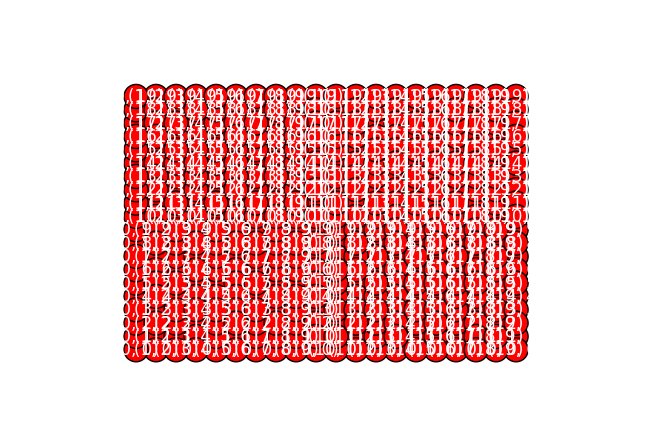

In [3]:
savefigure = False
seed = 1000
choice = 'grid'
d = 10
if choice == 'newman':
    size = 20
    prob = 0
    option= {'seed': seed, 'node_dim': d, 'model': 'newman'}
    option['k-NN'] = 2  
    RF = lat_rf(size, prob, option)
    G0 = RF.graph_build(size=size, prob=prob, option=option, save_fig=savefigure)
elif choice == 'partition':
    size = [10, 10]
    prob = [0.9, 0.1]
    option= {'seed': seed, 'node_dim': d, 'model': 'partition'}
    option['cutoff_freq'] = 12
    RF = lat_rf(size, prob, option)
    G0 = RF.graph_build(size=size, prob=prob, option=option, save_fig=savefigure)
elif choice == 'grid':
    size = [20, 20]
    prob = 0.6
    d = 1
    option= {'seed': seed, 'node_dim': d, 'model': 'grid'}
    RF = lat_rf(size, prob, option)
    G0 = RF.graph_build(size=size, prob=prob, option=option)
elif choice == 'binomial':
    size = 20
    prob = 0.18
    option= {'seed': seed, 'node_dim': d, 'model': 'binomial'}
    RF = lat_rf(size, prob, option)
    G0 = RF.graph_build(size=size, prob=prob, option=option)
elif choice == 'tree':
    size = 20
    gamma = 3
    prob = 0
    option= {'seed': seed, 'node_dim': d, 'gamma': gamma ,'model': 'tree'}
    option['cutoff_freq'] = 11
    RF = lat_rf(size, prob, option)
    G0 = RF.graph_build(size=size, prob=prob, option=option, save_fig=savefigure)

In [4]:
from simulation import ising_2dmodel

In [5]:
state, hist = ising_2dmodel(G0, size[0], size[1], 20)

In [6]:
ss = [v for v in G0.nodes_iter()]
list(zip(*[(n, i) for i, n in enumerate(G0.nodes_iter())]))
dict([(n, i) for i, n in enumerate(G0.nodes_iter())])

{(0, 0): 181,
 (0, 1): 245,
 (0, 2): 300,
 (0, 3): 362,
 (0, 4): 21,
 (0, 5): 84,
 (0, 6): 148,
 (0, 7): 210,
 (0, 8): 88,
 (0, 9): 152,
 (0, 10): 214,
 (0, 11): 274,
 (0, 12): 329,
 (0, 13): 393,
 (0, 14): 52,
 (0, 15): 118,
 (0, 16): 357,
 (0, 17): 16,
 (0, 18): 78,
 (0, 19): 143,
 (1, 0): 87,
 (1, 1): 23,
 (1, 2): 365,
 (1, 3): 302,
 (1, 4): 328,
 (1, 5): 273,
 (1, 6): 213,
 (1, 7): 151,
 (1, 8): 396,
 (1, 9): 333,
 (1, 10): 277,
 (1, 11): 217,
 (1, 12): 247,
 (1, 13): 183,
 (1, 14): 120,
 (1, 15): 55,
 (1, 16): 270,
 (1, 17): 209,
 (1, 18): 147,
 (1, 19): 83,
 (2, 0): 395,
 (2, 1): 54,
 (2, 2): 276,
 (2, 3): 332,
 (2, 4): 154,
 (2, 5): 216,
 (2, 6): 26,
 (2, 7): 91,
 (2, 8): 305,
 (2, 9): 368,
 (2, 10): 185,
 (2, 11): 250,
 (2, 12): 57,
 (2, 13): 122,
 (2, 14): 335,
 (2, 15): 398,
 (2, 16): 180,
 (2, 17): 244,
 (2, 18): 51,
 (2, 19): 117,
 (3, 0): 304,
 (3, 1): 249,
 (3, 2): 25,
 (3, 3): 367,
 (3, 4): 153,
 (3, 5): 90,
 (3, 6): 27,
 (3, 7): 215,
 (3, 8): 394,
 (3, 9): 331,
 (3, 10)

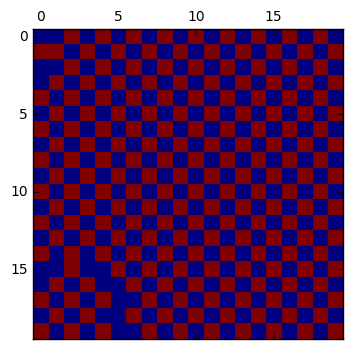

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

fig = plt.figure(4)
ax = fig.add_subplot(111)
cax = ax.matshow(hist[0], vmin=-0.2, vmax=0.2)

def animate(i):
    #print(i)
    cax.set_data(hist[i])  # update the data
    return cax,


# Init only required for blitting to give a clean slate.
def init():
    cax.set_data(hist[0]) 
    return cax,





# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(hist), interval=10, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('ising_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()